# Importing Groups

This code is importing several Python libraries such as NumPy, Pandas, Matplotlib, Seaborn, and SciPy, along with specific modules from SciPy library that contain statistical functions for various probability distributions. This allows the user to access and utilize these functions in their code for data analysis and visualization purposes.

In [ ]:
# Importing Groups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random
import scipy
from scipy.stats import binom, geom, nbinom, hypergeom, poisson, uniform, norm, expon, t

In [ ]:
# Uploading File, Url: https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs
from google.colab import files
uploaded = files.upload()

Saving Spotify_final_dataset.csv to Spotify_final_dataset.csv


In [ ]:
# Imports File and Prints
spotify = pd.read_csv('Spotify_final_dataset.csv')
spotify.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [ ]:
# Shows Info
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


In [ ]:
# Drops Null Values in Song Name
spotify = spotify.dropna(axis=0)
spotify.isnull().sum()

Position                  0
Artist Name               0
Song Name                 0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

# Optimizing Data

This code adds a new categorical variable to the "spotify" dataframe based on the "Position" column values, for better analysis of the data. It also optimizes the data types of several columns in the dataframe to reduce the memory usage of the dataframe, allowing for faster computations and better performance.


In [ ]:
# Adds New Category and Optimizes Data
spotify['Tiers'] = pd.cut(spotify['Position'], bins=[0, 1000, 5000, float("inf")], labels=['Top Tier', 'Middle Tier', 'Bottom Tier'])
spotify = spotify.astype({'Artist Name':'category',
                          'Song Name':'category', 
                          'Peak Position (xTimes)':'category'})
spotify = spotify.astype({'Position':'int16', 
                          'Days':'int16', 
                          'Peak Position':'int16', 
                          'Peak Streams':'int32', 
                          'Total Streams':'int32',
                          'Top 10 (xTimes)':'float16'})

In [ ]:
# Shows Optimized Data
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11080 entries, 0 to 11083
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Position                11080 non-null  int16   
 1   Artist Name             11080 non-null  category
 2   Song Name               11080 non-null  category
 3   Days                    11080 non-null  int16   
 4   Top 10 (xTimes)         11080 non-null  float16 
 5   Peak Position           11080 non-null  int16   
 6   Peak Position (xTimes)  11080 non-null  category
 7   Peak Streams            11080 non-null  int32   
 8   Total Streams           11080 non-null  int32   
 9   Tiers                   11080 non-null  category
dtypes: category(4), float16(1), int16(3), int32(2)
memory usage: 740.4 KB


In [ ]:
# Value Count for Tiers
spotify['Tiers'].value_counts()

Bottom Tier    6080
Middle Tier    4000
Top Tier       1000
Name: Tiers, dtype: int64

# Categorizing Data

Categorizing data into different numerical and categorical types is important to apply appropriate statistical methods and analysis techniques. This helps to gain a deeper understanding of the data and identify patterns and relationships within the data.

In [ ]:
# Shows Fields for Each Numerical Column
spotify.describe()

,Position,Days,Top 10 (xTimes),Peak Position,Peak Streams,Total Streams
count,11080.000000,11080.000000,1.108000e+04,11080.000000,1.108000e+04,1.108000e+04
mean,5542.053339,53.385289,2.714844e+00,83.075090,5.528854e+05,1.831515e+07
std,3200.252113,129.770716,inf,58.933045,6.282888e+05,5.220222e+07
min,1.000000,1.000000,0.000000e+00,1.000000,4.432300e+04,4.432300e+04
25%,2770.750000,2.000000,0.000000e+00,29.000000,2.432120e+05,3.821432e+05
50%,5541.500000,7.000000,0.000000e+00,75.000000,3.505885e+05,1.705556e+06
75%,8314.250000,39.000000,0.000000e+00,132.000000,5.962590e+05,1.079192e+07
max,11084.000000,2547.000000,3.020000e+02,200.000000,7.786096e+06,8.833697e+08


# Graphing Our Data

Selecting appropriate statistical charts and graph for a given dataset is important to articulate the benefits and limitations of different types of visualizations. This guarantees that the chosen visualization is suitable for the type of data and analysis goal, and enables effective communication and interpretation of the results.

In [ ]:
# Shows Artist Names by Total Streams
spotify[['Artist Name', 'Total Streams']]

,Artist Name,Total Streams
0,Post Malone,883369738
1,Juice WRLD,864832399
2,Lil Uzi Vert,781153024
3,J. Cole,734857487
4,Post Malone,718865961
...,...,...
11079,The Band Perry,51321
11080,Justin Timberlake,49512
11081,Mike WiLL Made,46547
11082,The Vamps,44962


Pie charts are useful for displaying the relative proportion or percentage of different categories within a dataset. They are also very visually appealing and easy to understand.

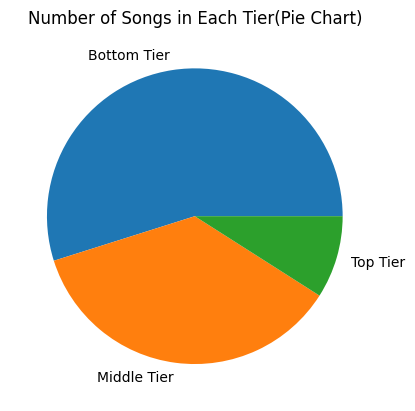

In [ ]:
# Distribution of Song Tiers
x = spotify['Tiers'].value_counts().plot(kind='pie')
x.set_title('Number of Songs in Each Tier(Pie Chart)')
x.set_ylabel('')
plt.show()

In [ ]:
# Shows Song Distribution of Tiers of Top 10 Artist
pivot = spotify[['Artist Name','Tiers']].value_counts(sort=False).unstack()
artist_freq = spotify['Artist Name'].value_counts().index
pivot = pivot.reindex(artist_freq)
pivot.head(10)

Tiers,Top Tier,Middle Tier,Bottom Tier
Artist Name,,,
Drake,41.0,140.0,27.0
Future,10.0,64.0,116.0
Taylor Swift,21.0,113.0,38.0
Logic,4.0,43.0,73.0
Trippie Redd,3.0,40.0,71.0
Lil Baby,11.0,33.0,61.0
Kanye West,10.0,71.0,10.0
Juice WRLD,16.0,53.0,22.0
The Weeknd,21.0,54.0,15.0


Bar charts are best for comparing different categories because they allow for a clear visualization of the relative sizes of each category. The clear, distinct bars make it easy understand how each category compares to one another.

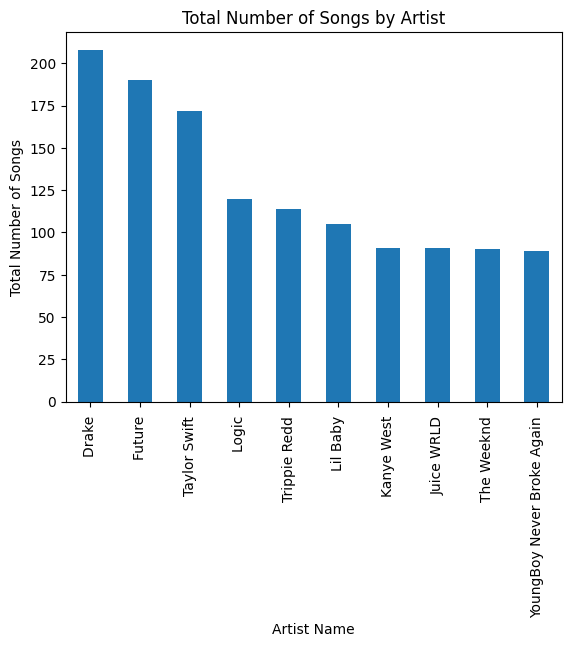

In [ ]:
# Shows all the songs in the Dataset by the Top 10 Artists
totals = spotify.groupby('Artist Name')['Song Name'].count().sort_values(ascending=False)
totals = totals[:10]
fig, ax = plt.subplots()
totals.plot(kind='bar', ax=ax)
ax.set_title('Total Number of Songs by Artist')
ax.set_xlabel('Artist Name')
ax.set_ylabel('Total Number of Songs')
plt.show()

Histograms visualize the distribution of numerical data, allowing for the identification of patterns. They provide a clear representation of the shape and spread of the data so the data distribution can be better understood.

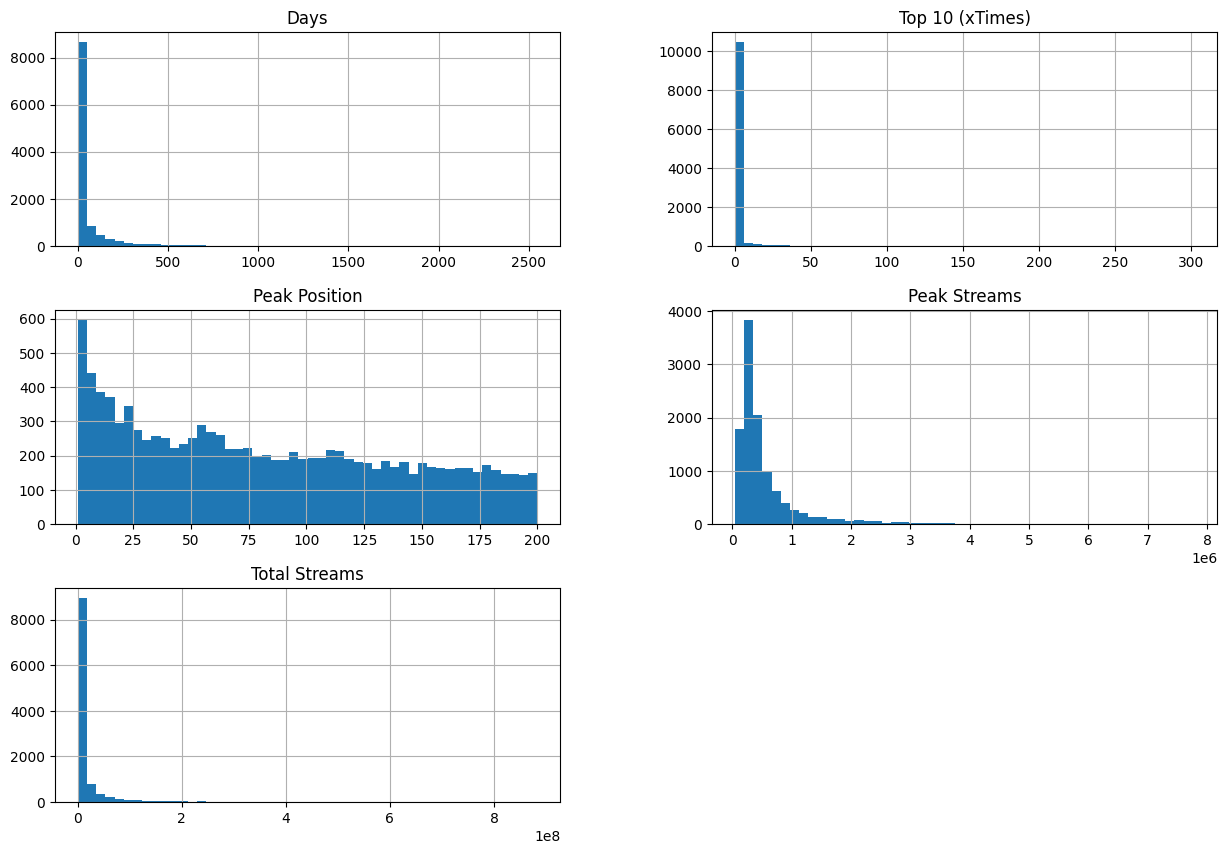

In [ ]:
# Displays Graphs for each Numerical Column
spotify.drop('Position', axis=1).hist(bins=50, figsize=(15,10))
plt.show()

I chose to make a box plot for the Peak Position variable because it is the only numerical variable in the dataset that would make sense in this chart. The box plot allows us to visualize the distribution of the peak positions of songs on the Billboard chart, including the median and quartiles.

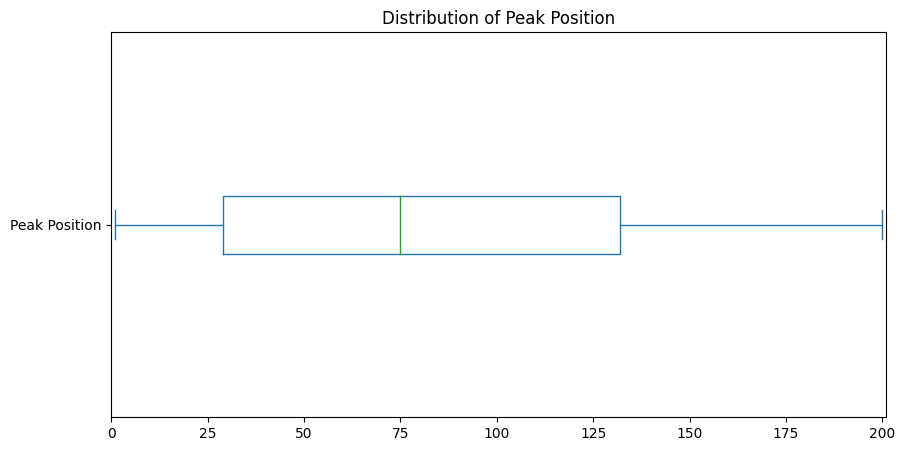

In [ ]:
# Displays Box Plot for Peak Position
spotify['Peak Position'].plot(kind='box', title='Distribution of Peak Position', figsize=(10,5), xlim=(0,201), vert=False)
plt.show()

# Descriptive Statistics

Descriptive statistics helps to summarize and describe the main features of a dataset.  It involves using numerical measures such as the median and many others.

In [ ]:
# Median for each Numerical Column
spotify[['Position', 'Days', 'Peak Position', 'Peak Streams', 'Total Streams']].apply(pd.Series.median)

Position            5541.5
Days                   7.0
Peak Position         75.0
Peak Streams      350588.5
Total Streams    1705555.5
dtype: float64

In [ ]:
# Max for each Numerical Column
spotify[['Position', 'Days', 'Peak Position', 'Peak Streams', 'Total Streams']].apply(pd.Series.max)

Position             11084
Days                  2547
Peak Position          200
Peak Streams       7786096
Total Streams    883369738
dtype: int32

In [ ]:
# Min
spotify[['Position', 'Days', 'Peak Position', 'Peak Streams', 'Total Streams']].apply(pd.Series.min)

Position             1
Days                 1
Peak Position        1
Peak Streams     44323
Total Streams    44323
dtype: int32

I find skewness to be very important in data analysis because it indicates the direction and degree of asymmetry in a dataset's distribution. Skewed data can have a significant impact on the results of statistical analyses, such as the mean and standard deviation, and can lead to incorrect interpretations of the data.

In [ ]:
# Skewness for each Numerical Column
spotify[['Position', 'Days', 'Peak Position', 'Peak Streams', 'Total Streams']].apply(pd.Series.skew)

Position         0.000353
Days             5.497869
Peak Position    0.323008
Peak Streams     3.759168
Total Streams    6.251008
dtype: float64

In [ ]:
# Kurtosis for each Numerical Column
spotify[['Position', 'Days', 'Peak Position', 'Peak Streams', 'Total Streams']].apply(pd.Series.kurt)

Position         -1.200374
Days             48.450578
Peak Position    -1.124789
Peak Streams     20.257823
Total Streams    56.085934
dtype: float64

#  Basic Probability of Events

Computing the probability of an event allows us to make informed decisions based on the likelihood of certain outcomes.

In [ ]:
# Determines whether a Song is in the Top Half of Position
def is_top_half(song):
    position = spotify[spotify["Song Name"] == song]["Position"].values[0]
    return position <= 5000

In [ ]:
# Shows the Halves for 10 Songs
for i in range(10):
    song = spotify["Song Name"].sample().values[0]
    if is_top_half(song):
        print(f"'{song}': Top Half")
    else:
        print(f"'{song}': Bottom Half")

'By Chance': Top Half
'BRIGHT': Bottom Half
'Beautiful People Beautiful Problems': Bottom Half
'BEBE': Top Half
'What A Time': Top Half
'Gnarly': Bottom Half
'Jumped Out the Window': Bottom Half
'Money Talk': Top Half
'Altar': Bottom Half
'Where I'm From': Bottom Half


As the sample size of data with even odds increases, the distribution of the data becomes uniform. This is because the possibility of each outcome becomes more evenly distributed.

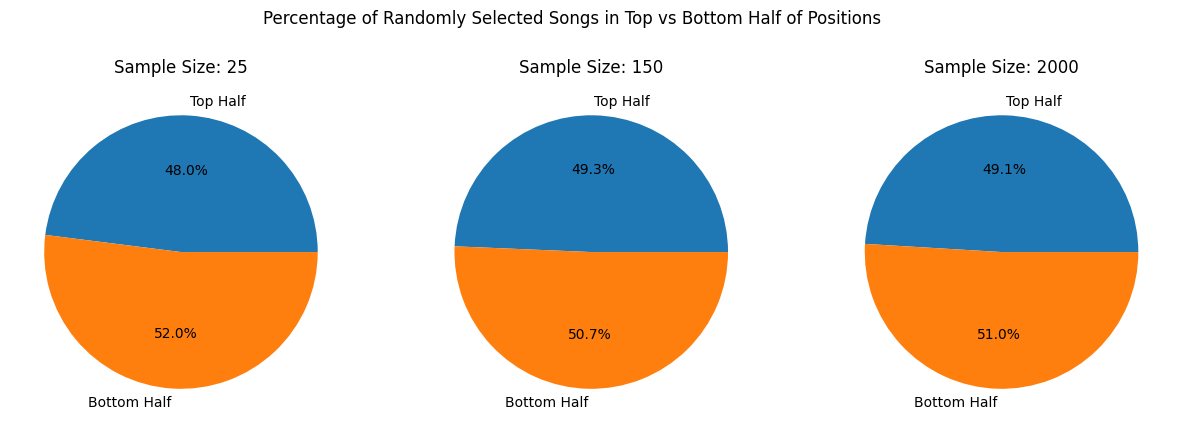

In [ ]:
# Graph to show Distribution v Sample Size
def plot_top_bottom_half(songs):
    top_half = sum([is_top_half(song) for song in songs])
    bottom_half = len(songs) - top_half
    
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, size in enumerate([25, 150, 2000]):
    songs = np.random.choice(spotify["Song Name"], size=size)
    top_half = sum([is_top_half(song) for song in songs])
    bottom_half = len(songs) - top_half
    labels = ["Top Half", "Bottom Half"]
    sizes = [top_half, bottom_half]
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axs[i].set_title(f"Sample Size: {size}") # Set title
    
plt.suptitle("Percentage of Randomly Selected Songs in Top vs Bottom Half of Positions")
plt.show()

In [ ]:
# Top 10 Artists
top_artists = spotify['Artist Name'].value_counts().index[:10]

Finding the probability of a random artist's song being top tier is an important aspect in describing our dataset. It provides valuable insight into the distribution of top tier songs across different artists and helps us identify which artists have more popular songs or hits compared to those who have lower-ranked songs on the list.
By calculating this probability, we can compare the percentage of top tier songs for different artists and draw conclusions about their popularity and success in the music industry.

In [ ]:
# Probability a Random Artist's Song is Top Tier 
for artist in top_artists:
    event = (spotify['Artist Name'] == artist) & (spotify['Tiers'] == 'Top Tier')
    sample_space = spotify['Artist Name'] == artist
    conditional_prob = event.sum() / sample_space.sum()
    print(f"{artist}: {conditional_prob:.2%}")

Drake : 19.71%
Future : 5.26%
Taylor Swift : 12.21%
Logic : 3.33%
Trippie Redd : 2.63%
Lil Baby : 10.48%
Kanye West : 10.99%
Juice WRLD : 17.58%
The Weeknd : 23.33%
YoungBoy Never Broke Again : 2.25%


In [ ]:
# Probability 3 Songs by an Artist are all Top Tier
for artist in top_artists:
    artist_songs = spotify[spotify['Artist Name'] == artist]
    total_songs = len(artist_songs)
    top_tier_songs = len(artist_songs[artist_songs['Tiers'] == 'Top Tier'])
    prob_top_tier_3_songs = 1
    for i in range(top_tier_songs, top_tier_songs - 3, -1):
      prob_top_tier_3_songs *= i / (total_songs - (top_tier_songs - i))
    print(f"{artist}: {prob_top_tier_3_songs*100:.2f}%")

Drake : 0.72%
Future : 0.01%
Taylor Swift : 0.16%
Logic : 0.00%
Trippie Redd : 0.00%
Lil Baby : 0.09%
Kanye West : 0.10%
Juice WRLD : 0.46%
The Weeknd : 1.13%
YoungBoy Never Broke Again : 0.00%


In [ ]:
# Probability 1 of 3 Random Songs is by an Artist
total_songs = len(spotify)
prob_artist_song = {}
for artist in top_artists:
    songs_by_artist = spotify[spotify['Artist Name'] == artist]
    prob_song_by_artist = len(songs_by_artist) / total_songs
    prob_artist_song[artist] = 1 - ((total_songs - len(songs_by_artist)) / total_songs) * ((total_songs - len(songs_by_artist) - 1) / (total_songs - 1)) * ((total_songs - len(songs_by_artist) - 2) / (total_songs - 2))
    
for artist in prob_artist_song:
  print(f"{artist}: {prob_artist_song[artist]*100:.2f}%")

Drake : 5.53%
Future : 5.06%
Taylor Swift : 4.59%
Logic : 3.21%
Trippie Redd : 3.06%
Lil Baby : 2.82%
Kanye West : 2.44%
Juice WRLD : 2.44%
The Weeknd : 2.42%
YoungBoy Never Broke Again : 2.39%


# Discrete Probability Distributions

Discrete probability distributions provide a way to model and analyze random events or outcomes that can only take on a finite number of values. 



*   Finding the discrete distributions of data helps us better understand our dataset because it identifies the frequency of different categories or groups within the data. In the case of our dataset, the discrete distribution of song tiers helps us understand the proportion of songs in each tier, with the top tier being the most exclusive and the lowest tier being the most common. It also shows the rarity of a song having the 'Top Tier' label.



Binomial distribution models the probability of a certain number of successes in a fixed number of independent trials with a constant probability of success in each trial.

In [ ]:
# Binomial Distribution 
# Probability that there are 8 Middle Tier Songs Selected out of 20
p = len(spotify[spotify['Tiers'] == 'Bottom Tier']) / len(spotify)
n = 10
k = 5
p_success = binom.pmf(k, n, p)
print("Probability of randomly picking 10 songs and exactly 5 of them are bottom tier:", p_success)

Probability of randomly picking 10 songs and exactly 5 of them are bottom tier: 0.23462314657690098


In [ ]:
# Probability that there are 8 Middle Tier Songs Selected out of 20
p = len(spotify[spotify['Tiers'] == 'Middle Tier']) / len(spotify)
n = 20
k = 8
p_success = binom.pmf(k, n, p)
print("Probability of randomly picking 20 songs and exactly 8 of them are middle tier:", p_success)

Probability of randomly picking 20 songs and exactly 8 of them are middle tier: 0.16840343447962847


Binomial distribution graphs often have a probability density function that is bell-shaped with the maximum probability at the mean.

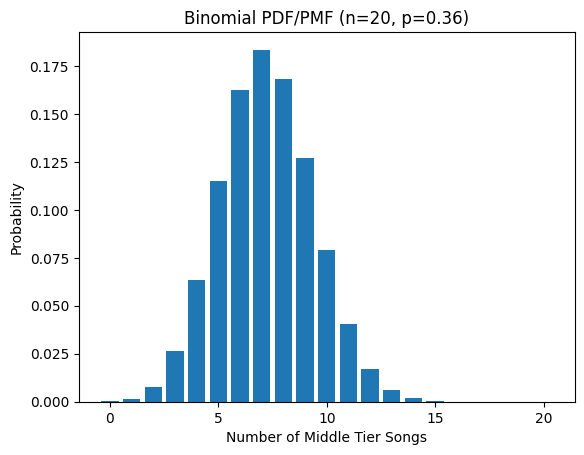

In [ ]:
# Graph of Binomial Distribution to show the Probabiliy of how many Middle Tier Songs will be Selected
p = len(spotify[spotify['Tiers'] == 'Middle Tier']) / len(spotify)
n = 20
k_values = list(range(21))
probabilities = [binom.pmf(k, n, p) for k in k_values]

# Create bar plot
plt.bar(k_values, probabilities)
plt.xlabel('Number of Middle Tier Songs')
plt.ylabel('Probability')
plt.title(f"Binomial PDF/PMF (n={n}, p={p:.2f})")
plt.show()

Geometric distribution models the number of independent Bernoulli trials needed to get the first success. It is different from the binomial distribution in that the binomial distribution models the number of successes in a fixed number of independent Bernoulli trials, while the geometric distribution models the number of trials needed to obtain the first success.

In [ ]:
# Geometric Distribution 
# Probability that the Position of the First Top Tier Song Selected is the 5th
p = len(spotify[spotify['Tiers'] == 'Top Tier']) / len(spotify)
n = 5
p_success = geom.pmf(n, p)
print(f"The probability that the first top tier song is the 5th song selected is {p_success:.6f}")

The probability that the first top tier song is the 5th song selected is 0.061822


Geometric Distribution graphs should resemble a decreasing curve, starting from the origin and approaching 0 as the number of trials increases.

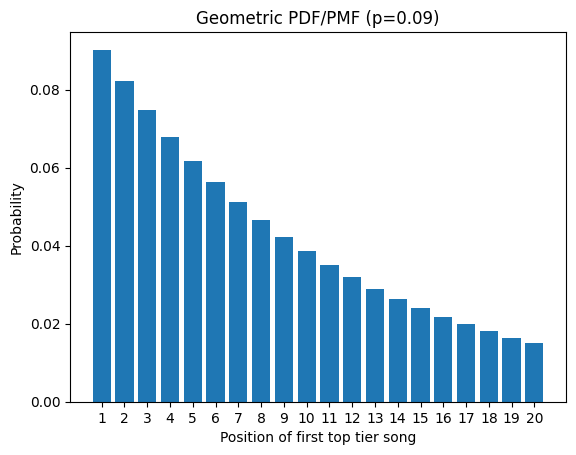

In [ ]:
# Graph of Geometric Distribution to show the Probabiliy of First Top Tier Song Picked 
p = len(spotify[spotify['Tiers'] == 'Top Tier']) / len(spotify)
n = np.arange(1, 21)
probabilities = geom.pmf(n, p)
plt.bar(n, probabilities)
plt.xticks(n)
plt.xlabel('Position of first top tier song')
plt.ylabel('Probability')
plt.title(f'Geometric PDF/PMF (p={p:.2f})')
plt.show()

Negative binomial distribution is important because it shows the number of failures that occur before a fixed number of successes is reached in a series of independent and identically distributed Bernoulli trials. It is different from binomial and geometric distributions because it allows for the number of trials required to achieve the desired number of successes to be greater than one.

In [ ]:
# Negative Binomial Distribution
# Probability of Picking a 5th Top Tier song on the 15th Attempt
p = len(spotify[spotify['Tiers'] == 'Top Tier']) / len(spotify)
n = 3  # number of successes
r = 15  # number of trials
p_success = nbinom.pmf(r - n, n, p)
print("Probability of getting the 5th top tier song on the 15th trial:", p_success)

Probability of getting the 5th top tier song on the 15th trial: 0.021501629381123308


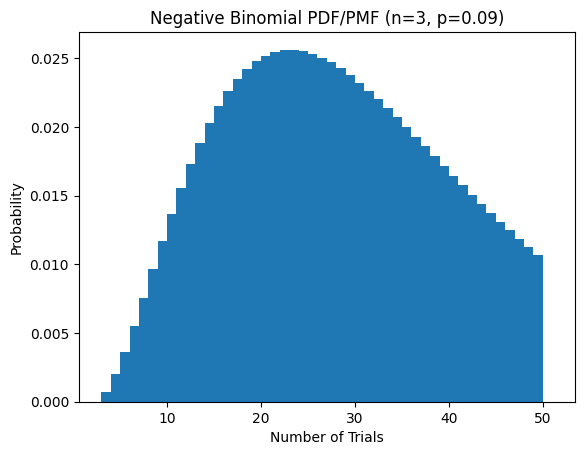

In [ ]:
# Graph of Negative Binomial Distribution to show the Probability of Selecting a 3rd Top Tier Song
p = len(spotify[spotify['Tiers'] == 'Top Tier']) / len(spotify)
n = 3  # number of successes
r_values = range(3, 50)  # number of trials
probabilities = [nbinom.pmf(r - n, n, p) for r in r_values]

plt.hist(r_values, weights=probabilities, bins=range(3, 52), rwidth=1)
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.title(f'Negative Binomial PDF/PMF (n={n}, p={p:.2f})')

plt.show()

Hypergeometric distribution models a finite population without replacement, unlike the binomial distribution which deals with a population with replacement and geometric and negative binomial distributions which have independent Bernoulli trials.

In [ ]:
# Hypergeometric Distribution for Exactly 30 Middle tier Songs
N = len(spotify)
n = 100
M = len(spotify[spotify['Tiers'] == 'Middle Tier'])
m = 30
p = hypergeom.pmf(m, N, M, n)
print("Probability of exactly 30 middle tier songs in the sample:", p)

Probability of exactly 30 middle tier songs in the sample: 0.03773317681125317


# Continuous Probability Distributions

Continuous probability distributions are used to model random variables that can take on any value within a range, rather than just discrete values. 

In [ ]:
# Mu and Sigma's Values
mu = spotify['Peak Position'].mean()
sigma = spotify['Peak Position'].std()
print(f'Population mean: {mu:.2f}')
print(f'Population standard deviation: {sigma:.2f}')

Population mean: 83.08
Population standard deviation: 58.93


Below is only the raw data distribution of Peak Position. 

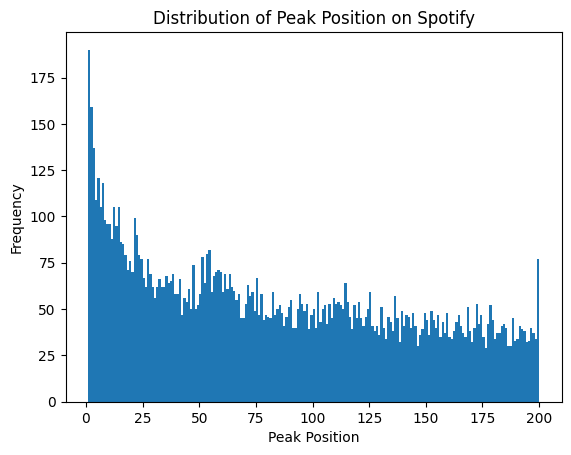

In [ ]:
# Distribution of Peak Position
plt.hist(spotify['Peak Position'], bins=range(1, 201))
plt.xlabel('Peak Position')
plt.ylabel('Frequency')
plt.title('Distribution of Peak Position on Spotify')
plt.show()

Normal distribution is a continuous probability distribution that is symmetric around the mean and bell-shaped.

In [ ]:
# Normal Distribution
print(f'P(Y<3) = norm.cdf(3, loc={mu}, scale={sigma}) = {norm.cdf(4, loc=mu, scale=sigma):.4f}')
print(f'P(1<Y<75) = norm.cdf(75, loc={mu}, scale={sigma}) - norm.cdf(1, loc={mu}, scale={sigma}) = {norm.cdf(75, loc=mu, scale=sigma) - norm.cdf(1, loc=mu, scale=sigma):.4f}')

P(Y<3) = norm.cdf(3, loc=83.07509025270758, scale=58.93304546144506) = 0.0898
P(1<Y<75) = norm.cdf(75, loc=83.07509025270758, scale=58.93304546144506) - norm.cdf(1, loc=83.07509025270758, scale=58.93304546144506) = 0.3636


In [ ]:
# Percent Point Function to Find 90th Percentile
y = norm.ppf(0.9, loc=mu, scale=sigma)
print(f'The value of Y that corresponds to the {.9*100:.1f}th percentile is {y:.2f}')

The value of Y that corresponds to the 90.0th percentile is 158.60


# Sampling Distributions

Sampling distributions help us make inferences about a population based on a sample.

In [ ]:
p = 0.36101083032490977
n = 100
sample_mean = n * p
sample_std = np.sqrt(n * p * (1 - p))
z_lower = (0.2 * n - sample_mean) / sample_std
z_upper = (0.4 * n - sample_mean) / sample_std
prob = norm.cdf(z_upper) - norm.cdf(z_lower)
print(f"The probability of finding between 20% and 40% middle tier songs in a sample of 100 is {prob:.4f}")

The probability of finding between 20% and 40% middle tier songs in a sample of 100 is 0.7911


In [ ]:
n = 100
sample_mean = 84
sample_std_dev = sigma / np.sqrt(n)

z_score = (sample_mean - mu) / sample_std_dev
prob = norm.cdf(z_score)

print(f"The probability of finding a sample mean of {sample_mean:.2f} or less in a sample of {n} is {prob:.4f}")

The probability of finding a sample mean of 84.00 or less in a sample of 100 is 0.5624


# Confidence Intervals

Confidence intervals are important because they provide a range of values which the true population parameter lies in with a certain level of confidence. These tests can assist in estimating the true value of a population parameter based on a sample. They help us understand our dataset because it determines the level of uncertainty in our estimate of the proportion of Song Tiers. 

In [ ]:
# Confidence intervals for Top Tier Songs
n = 100
p = len(spotify[spotify['Tiers'] == 'Top Tier']) / len(spotify)
scale = np.sqrt((p*(1-p))/n)
cls = [0.80, 0.90, 0.95, 0.99]

for cl in cls:
    ci = norm.interval(cl, p, scale)
    print(f"{int(cl*100)}% confidence interval for the true percentage of top tier songs: {ci}")

80% confidence interval for the true percentage of top tier songs: (0.053530685183359156, 0.12697472997909573)
90% confidence interval for the true percentage of top tier songs: (0.043120502093687306, 0.13738491306876757)
95% confidence interval for the true percentage of top tier songs: (0.034091220775419935, 0.14641419438703496)
99% confidence interval for the true percentage of top tier songs: (0.01644400263238527, 0.16406141253006962)


In [ ]:
# Confidence intervals for Middle Tier Songs
n = 100
p = len(spotify[spotify['Tiers'] == 'Middle Tier']) / len(spotify)
scale = np.sqrt((p*(1-p))/n)
cls = [0.80, 0.90, 0.95, 0.99]

for cl in cls:
    ci = norm.interval(cl, p, scale)
    print(f"{int(cl*100)}% confidence interval for the true percentage of middle tier songs: {ci}")

80% confidence interval for the true percentage of middle tier songs: (0.2994587196843806, 0.42256294096543895)
90% confidence interval for the true percentage of middle tier songs: (0.2820095515971446, 0.4400121090526749)
95% confidence interval for the true percentage of middle tier songs: (0.2668750005453289, 0.4551466601044906)
99% confidence interval for the true percentage of middle tier songs: (0.23729537903459538, 0.48472628161522413)


In [ ]:
# Confidence intervals for Bottom Tier Songs
n = 100
p = len(spotify[spotify['Tiers'] == 'Bottom Tier']) / len(spotify)
scale = np.sqrt((p*(1-p))/n)
cls = [0.80, 0.90, 0.95, 0.99]

for cl in cls:
    ci = norm.interval(cl, p, scale)
    print(f"{int(cl*100)}% confidence interval for the true percentage of bottom tier songs: {ci}")

80% confidence interval for the true percentage of bottom tier songs: (0.4849640098996956, 0.61250891428803)
90% confidence interval for the true percentage of bottom tier songs: (0.46688540583411003, 0.6305875183536156)
95% confidence interval for the true percentage of bottom tier songs: (0.4512049129413679, 0.6462680112463578)
99% confidence interval for the true percentage of bottom tier songs: (0.4205582790715501, 0.6769146451161756)


Confidence intervals for means are important for our dataset because they tell us the range of values where the true population mean is likely to be. They give us an idea of how much we can trust the sample mean to accurately represent the whole population. This helps us make better decisions based on the characteristics of the population.

In [ ]:
# Confidence intervals for Peak Position Means
n = len(spotify)
conf_levels = [0.80, 0.90, 0.95, 0.99]
for cl in conf_levels:
    t_score = t.ppf((1 + cl) / 2, n - 1)
    margin_error = t_score * sigma / np.sqrt(n)
    ci_lower = mu - margin_error
    ci_upper = mu + margin_error
    print(f"{int(cl*100)}% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

80% confidence interval: (82.3575, 83.7926)
90% confidence interval: (82.1541, 83.9961)
95% confidence interval: (81.9776, 84.1725)
99% confidence interval: (81.6327, 84.5175)


In [ ]:
# Confidence intervals for Peak Streams Means
mu = spotify['Peak Streams'].mean()
sigma = spotify['Peak Streams'].std()
n = len(spotify)
conf_levels = [0.80, 0.90, 0.95, 0.99]
for cl in conf_levels:
    t_score = t.ppf((1 + cl) / 2, n - 1)
    margin_error = t_score * sigma / np.sqrt(n)
    ci_lower = mu - margin_error
    ci_upper = mu + margin_error
    print(f"{int(cl*100)}% confidence interval: ({ci_lower:.4f}, {ci_upper:.4f})")

80% confidence interval: (545235.5473, 560535.1939)
90% confidence interval: (543066.6931, 562704.0481)
95% confidence interval: (541185.3948, 564585.3464)
99% confidence interval: (537508.0266, 568262.7146)
